In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [96]:
df = pd.read_csv('cardekho_imputated.csv', index_col=[0])

In [97]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [98]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [99]:
df.drop('car_name', axis=1, inplace=True)
df.drop('brand', axis=1, inplace=True)

In [100]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Numerical Features:", len(num_feature))
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Categorical Features:", len(cat_feature))
discreate_feature = [feature for feature in num_feature if len(df[feature].unique()) < 25]
print("Discrete Features:", len(discreate_feature))
continuous_feature = [feature for feature in num_feature if feature not in discreate_feature]
print("Continuous Features:", len(continuous_feature))

Numerical Features: 7
Categorical Features: 4
Discrete Features: 2
Continuous Features: 5


In [101]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['model'] = le.fit_transform(X['model'])

In [103]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [104]:
num_featurs = X.select_dtypes(exclude='object').columns
one_hot = ['seller_type', 'fuel_type', 'transmission_type']

In [105]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
oh = OneHotEncoder(drop='first')
num_transformer = StandardScaler()
transformer = ColumnTransformer([
    ('OneHotEncoder', oh, one_hot),
    ('StandardScaler', num_transformer, num_featurs)
    
],remainder='passthrough')

In [106]:
X = transformer.fit_transform(X)

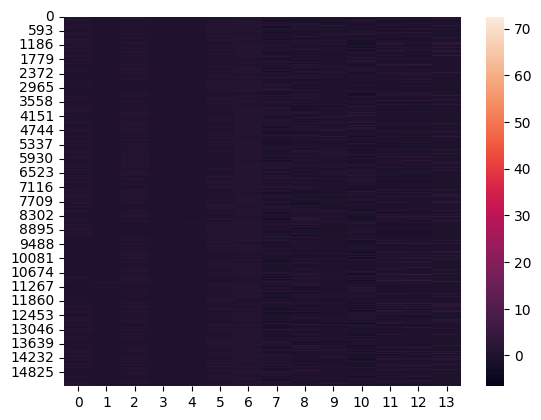

In [107]:
sns.heatmap(X)
plt.plot(X,y)
plt.show()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sns.heatmap(X_train)

In [109]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [110]:
def eval(true,predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mse, mae, r2, rmse

In [111]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_train_mse , model_train_mae, model_train_r2, model_train_rmse = eval(y_train, y_train_pred)
    model_test_mse , model_test_mae, model_test_r2, model_test_rmse = eval(y_test, y_test_pred)

    print(f"{list(models.keys())[i]}: \n")
    print('RMSE:{:.4f}'.format(model_train_rmse))
    print('MAE:{:.4f}'.format(model_train_mae))
    print('R2:{:.4f}'.format(model_train_r2))

    print('RMSE:{:.4f}'.format(model_test_rmse))
    print('MAE:{:.4f}'.format(model_test_mae))
    print('R2:{:.4f}'.format(model_test_r2))
   

Linear Regression: 

RMSE:553855.6665
MAE:268101.6071
R2:0.6218
RMSE:502543.5930
MAE:279618.5794
R2:0.6645
Ridge: 

RMSE:553856.3160
MAE:268059.8015
R2:0.6218
RMSE:502533.8230
MAE:279557.2169
R2:0.6645
Lasso: 

RMSE:553855.6710
MAE:268099.2226
R2:0.6218
RMSE:502542.6696
MAE:279614.7461
R2:0.6645
KNN: 

RMSE:325882.1502
MAE:91395.5548
R2:0.8691
RMSE:253138.6083
MAE:112578.2436
R2:0.9149
Decision Tree: 

RMSE:20797.2352
MAE:5164.8199
R2:0.9995
RMSE:296533.3055
MAE:123433.2279
R2:0.8832
Random Forest: 

RMSE:128149.9434
MAE:39981.3969
R2:0.9798
RMSE:230418.9828
MAE:101811.9186
R2:0.9295


In [112]:
knn = {    'n_neighbors': [3, 5, 7, 9, 11],
       }
rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 7, 'auto' , 8]
}

In [113]:
random_cv_models = [
    ('KNN', KNeighborsRegressor(), knn),
    ('Random Forest', RandomForestRegressor(), rf)
]

In [114]:
from sklearn.model_selection import RandomizedSearchCV
model_params = {}
for name, model, params in random_cv_models:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=10, cv=3, verbose=2, n_jobs=1)
    random_search.fit(X_train, y_train)

    model_params[name] = random_search.best_params_
    # print(f"{name} Best Parameters: {random_search.best_params_}")
    # print(f"{name} Best Score: {-random_search.best_score_:.4f}")

    for model_name in model_params:
        print(f"{model_name} Best Parameters: {model_params[model_name]}")
        

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s


/Users/fakhirhassan/Downloads/CASTER-master/.conda/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_neighbors=9; total time=   0.0s
[CV] END ......................................n_neighbors=9; total time=   0.0s
[CV] END ......................................n_neighbors=9; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.1s
[CV] END .....................................n_neighbors=11; total time=   0.1s
[CV] END .....................................n_neighbors=11; total time=   0.1s
KNN Best Parameters: {'n_neighbors': 7}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=auto, min_samples_split=10, n_estimators=100; total t

/Users/fakhirhassan/Downloads/CASTER-master/.conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fakhirhassan/Downloads/CASTER-master/.conda/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fakhirhassan/Downloads/CASTER-master/.conda/lib/python3.12/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/Users/fakhirhassan/Downloads/CASTER-master/.conda/lib/python3.12/sit

KNN Best Parameters: {'n_neighbors': 7}
Random Forest Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [115]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=50,min_samples_split=2,max_depth=None,max_features=8),
    'KNN': KNeighborsRegressor(n_neighbors=7)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    model_train_mse , model_train_mae, model_train_r2, model_train_rmse = eval(y_train, y_train_pred)
    model_test_mse , model_test_mae, model_test_r2, model_test_rmse = eval(y_test, y_test_pred)

    print(f"{list(models.keys())[i]}: \n")
    print('RMSE:{:.4f}'.format(model_train_rmse))
    print('MAE:{:.4f}'.format(model_train_mae))
    print('R2:{:.4f}'.format(model_train_r2))

    print('RMSE:{:.4f}'.format(model_test_rmse))
    print('MAE:{:.4f}'.format(model_test_mae))
    print('R2:{:.4f}'.format(model_test_r2))

Random Forest: 

RMSE:128102.9969
MAE:39989.1524
R2:0.9798
RMSE:218472.7553
MAE:99569.8795
R2:0.9366
KNN: 

RMSE:359821.0774
MAE:97841.2093
R2:0.8404
RMSE:241303.8657
MAE:112768.8186
R2:0.9227
